## Challenge Set 6

In [52]:
##imports

import pandas as pd
pd.set_option('display.max_colwidth', 1000)
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression and Learning Curve challenges
### Challenge 1
Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)


In [15]:
X = np.random.uniform(0, 1, size=100)[:, np.newaxis]

In [16]:
df = 7 + 2.5*np.log(X) + np.random.normal(scale=0.3, size=100)[:, np.newaxis]

In [17]:
df.shape

(100, 1)

In [25]:
est1 = make_pipeline(PolynomialFeatures(2), LinearRegression())
est1.fit(X, df);
preds1 = est1.predict(X)

In [27]:
est2 = LinearRegression()
est2.fit(np.log(X), df)
preds2 = est2.predict(np.log(X))

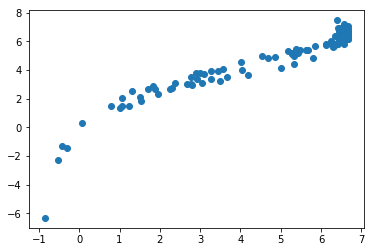

In [28]:
plt.scatter(preds1,df)

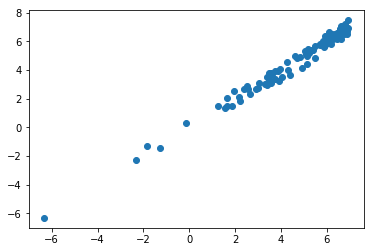

In [32]:
plt.scatter(preds2,df)


### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)


In [33]:
X = np.random.uniform(0, 1, size=100)[:, np.newaxis]


In [37]:
d2 = 7 + 2.5*X + 3*(X**2) + np.random.normal(scale=0.3, size=100)[:, np.newaxis]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,d2, test_size = 0.3)

In [47]:
est3 = make_pipeline(PolynomialFeatures(2), LinearRegression())
est3.fit(X_train, y_train);

In [45]:
train_error = mean_squared_error(y_train, est3.predict(X_train))
test_error = mean_squared_error(y_test, est3.predict(X_test))

In [48]:
print(train_error)
print(test_error)

0.0700963662484
0.0745342925656


### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

- training error
- test error
- R squared
- AIC

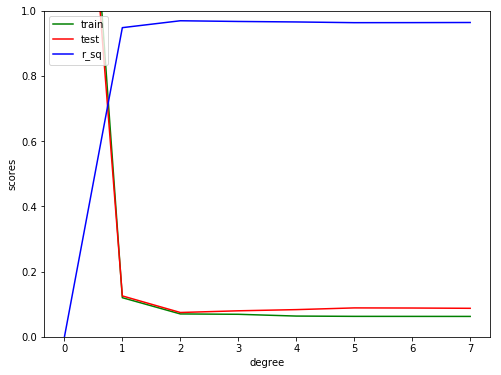

In [54]:
# Step through degrees from 0 to 7 and store the training and test (generalization) error.
# create array of zeros,
train_error = np.empty(8)
test_error = np.empty(8)
r_sq = np.empty(8)
AIC = np.empty(8)
for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))
    r_sq[degree] = r2_score(y_test, est.predict(X_test))
    #AIC[degree] = (y_test, est.predict(X_test))

# Plot the training, test errors, rsquared, and AIC against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(8), train_error, color='green', label='train')
plt.plot(np.arange(8), test_error, color='red', label='test')
plt.plot(np.arange(8), r_sq, color='blue', label='r_sq')
#plt.plot(np.arange(8), AIC, color='black', label='AIC')
plt.ylim((0.0, 1e0))
plt.ylabel('scores')
plt.xlabel('degree')
plt.legend(loc='upper left')

### Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [90]:
train_error = np.empty(len(X)//5)
test_error = np.empty(len(d2)//5)
for i in range(5, len(X), 5):
    X_train = X[:i, :]
    X_test = X[i:, :]
    y_train = d2[:i,:]
    y_test = d2[i:, :]
    est.fit(X_train, y_train)
    train_error[i//5] = mean_squared_error(y_train, est.predict(X_train))
    test_error[i//5] = mean_squared_error(y_test, est.predict(X_test))

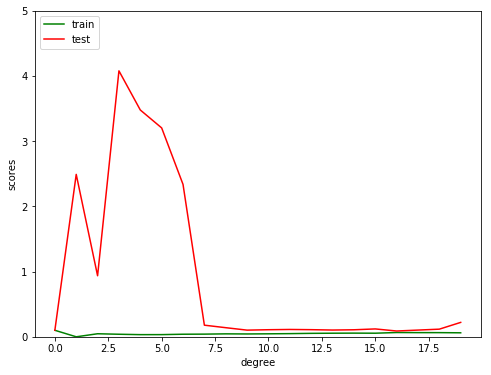

In [97]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(20), train_error, color='green', label='train')
plt.plot(np.arange(20), test_error, color='red', label='test')
plt.ylim((0.0, 5e0))
plt.ylabel('scores')
plt.xlabel('number of data cuts')
plt.legend(loc='upper left')